In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv")
df["STATE/UT"] = df["STATE/UT"].str.title()
df["STATE/UT"] = df["STATE/UT"].str.replace(" ", "")
df["Year"].astype("int")
df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,AndhraPradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,1,AndhraPradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,AndhraPradesh,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,AndhraPradesh,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,AndhraPradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0


# EDA 1: Rape Case Study

In [3]:
RapeCase = df.groupby("STATE/UT")["Rape"].sum().reset_index()
RapeCase["Rank"] = RapeCase["Rape"].rank(ascending = False)
RapeCase.sort_values(by = "Rank").dropna()

,STATE/UT,Rape,Rank
20,MadhyaPradesh,90996,1.0
34,UttarPradesh,51150,2.0
21,Maharashtra,48974,3.0
36,WestBengal,47876,4.0
29,Rajasthan,45684,5.0
3,Assam,40190,6.0
1,AndhraPradesh,32150,7.0
4,Bihar,30758,8.0
26,Odisha,30480,9.0
6,Chhattisgarh,29308,10.0


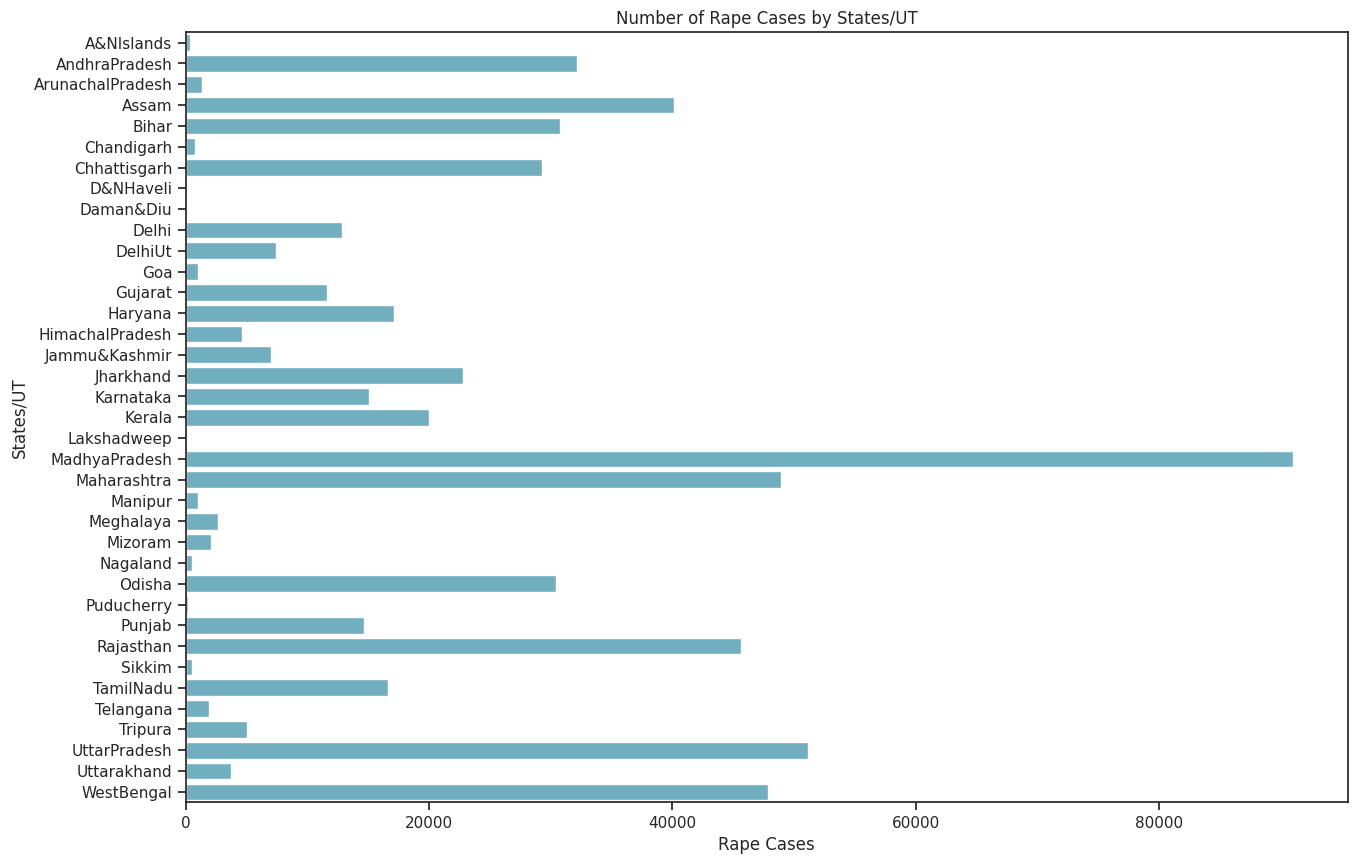

In [4]:
sns.set(style = "ticks")
plt.figure(figsize=(15,10))
sns.barplot(x="Rape", y="STATE/UT", data=RapeCase, color = "c")
plt.xlabel("Rape Cases")
plt.ylabel("States/UT")
plt.title("Number of Rape Cases by States/UT")
plt.show()

In [5]:
RapeCaseYear = df.groupby("Year")["Rape"].sum().reset_index()
RapeCaseYear["Rank"] = RapeCaseYear["Rape"].rank(ascending = False)
RapeCaseYear.sort_values(by = "Rank")
RapeCaseYear["Year"] = RapeCaseYear["Year"].astype("int")
RapeCaseYear

,Year,Rape,Rank
0,2001,32150,13.0
1,2002,32746,12.0
2,2003,31694,14.0
3,2004,36466,11.0
4,2005,36718,10.0
5,2006,38696,9.0
6,2007,41474,8.0
7,2008,42934,6.0
8,2009,42794,7.0
9,2010,44344,5.0


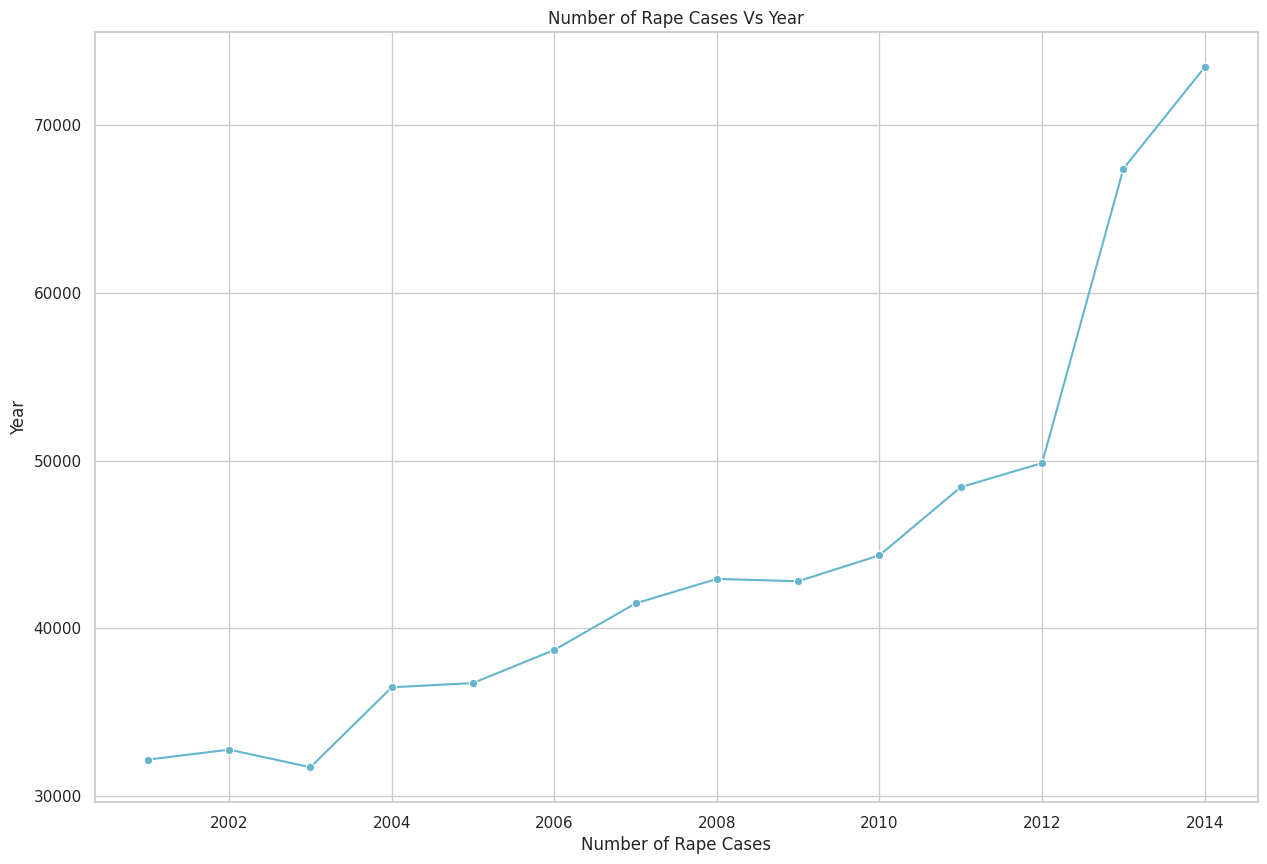

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="Rape", data=RapeCaseYear, color="c", marker = "o")
plt.xlabel("Number of Rape Cases")
plt.ylabel("Year")
plt.title("Number of Rape Cases Vs Year")
plt.show()

Top 10 States with Highes Rape Cases: 

In [7]:
RapeCase.sort_values(by = "Rank").head(10).set_index("Rank")

,STATE/UT,Rape
Rank,,
1.0,MadhyaPradesh,90996
2.0,UttarPradesh,51150
3.0,Maharashtra,48974
4.0,WestBengal,47876
5.0,Rajasthan,45684
6.0,Assam,40190
7.0,AndhraPradesh,32150
8.0,Bihar,30758
9.0,Odisha,30480


# EDA 2: Kidnapping and Aducting Case Study

In [8]:
KACase = df.groupby("STATE/UT")["Kidnapping and Abduction"].sum().reset_index()
KACase["Rank"] = KACase["Kidnapping and Abduction"].rank(ascending = False)
KACase.sort_values(by = "Rank").dropna()

,STATE/UT,Kidnapping and Abduction,Rank
34,UttarPradesh,135906,1.0
29,Rajasthan,66278,2.0
3,Assam,62074,3.0
36,WestBengal,61158,4.0
4,Bihar,57086,5.0
20,MadhyaPradesh,35608,6.0
12,Gujarat,34670,7.0
1,AndhraPradesh,34504,8.0
9,Delhi,31300,9.0
31,TamilNadu,30908,10.0


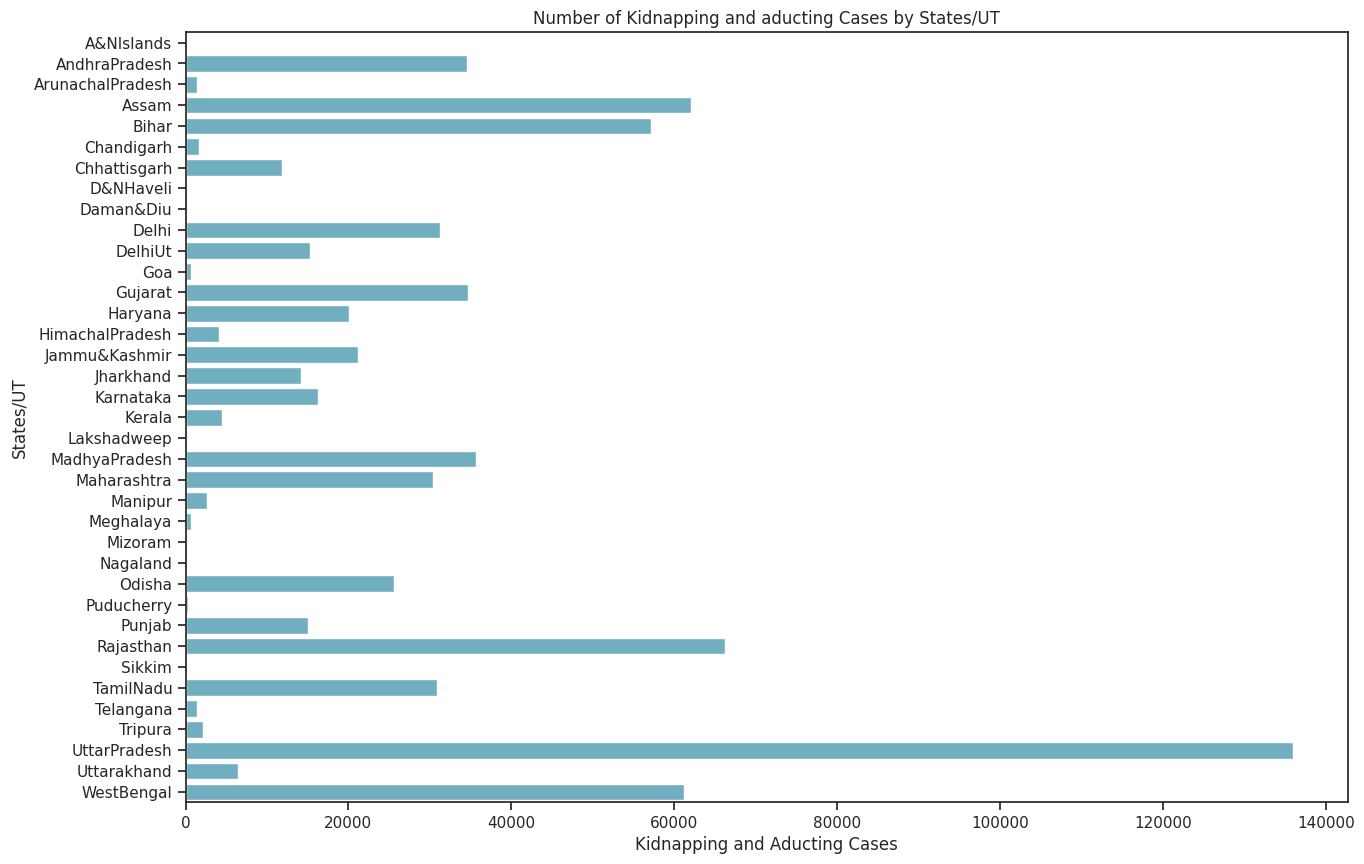

In [9]:
sns.set(style = "ticks")
plt.figure(figsize=(15,10))
sns.barplot(x="Kidnapping and Abduction", y="STATE/UT", data=KACase, color = "c")
plt.xlabel("Kidnapping and Aducting Cases")
plt.ylabel("States/UT")
plt.title("Number of Kidnapping and aducting Cases by States/UT")
plt.show()

In [10]:
KACaseYear = df.groupby("Year")["Kidnapping and Abduction"].sum().reset_index()
KACaseYear["Rank"] = KACaseYear["Kidnapping and Abduction"].rank(ascending = False)
KACaseYear.sort_values(by = "Rank")
KACaseYear["Year"] = RapeCaseYear["Year"].astype("int")
KACaseYear

,Year,Kidnapping and Abduction,Rank
0,2001,29290,12.0
1,2002,29012,13.0
2,2003,26592,14.0
3,2004,31156,11.0
4,2005,31500,10.0
5,2006,34828,9.0
6,2007,40832,8.0
7,2008,45878,7.0
8,2009,51482,6.0
9,2010,59590,5.0


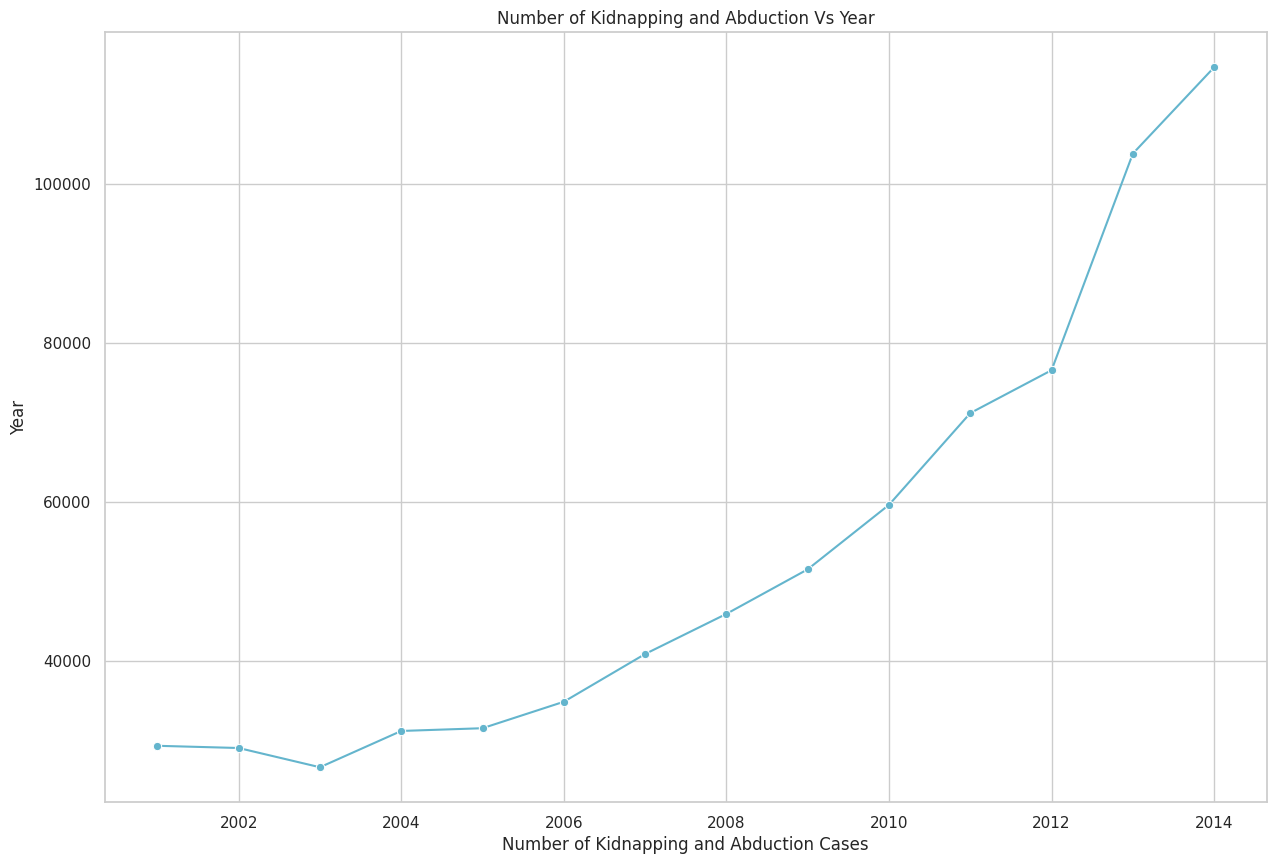

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="Kidnapping and Abduction", data=KACaseYear, color="c", marker = "o")
plt.xlabel("Number of Kidnapping and Abduction Cases")
plt.ylabel("Year")
plt.title("Number of Kidnapping and Abduction Vs Year")
plt.show()

Top 10 State with highest Kidnapping and Aducting Cases

In [12]:
KACase.sort_values(by = "Rank").head(10).set_index("Rank")

,STATE/UT,Kidnapping and Abduction
Rank,,
1.0,UttarPradesh,135906
2.0,Rajasthan,66278
3.0,Assam,62074
4.0,WestBengal,61158
5.0,Bihar,57086
6.0,MadhyaPradesh,35608
7.0,Gujarat,34670
8.0,AndhraPradesh,34504
9.0,Delhi,31300


# EDA 3: Dowry Deaths Case Study

In [13]:
DowryCase = df.groupby("STATE/UT")["Dowry Deaths"].sum().reset_index()
DowryCase["Rank"] = DowryCase["Dowry Deaths"].rank(ascending = False)
DowryCase.sort_values(by = "Rank")

,STATE/UT,Dowry Deaths,Rank
34,UttarPradesh,57256,1.0
4,Bihar,32206,2.0
20,MadhyaPradesh,21090,3.0
1,AndhraPradesh,13844,4.0
36,WestBengal,12308,5.0
29,Rajasthan,11854,6.0
26,Odisha,10782,7.0
21,Maharashtra,9696,8.0
16,Jharkhand,7896,9.0
13,Haryana,7372,10.0


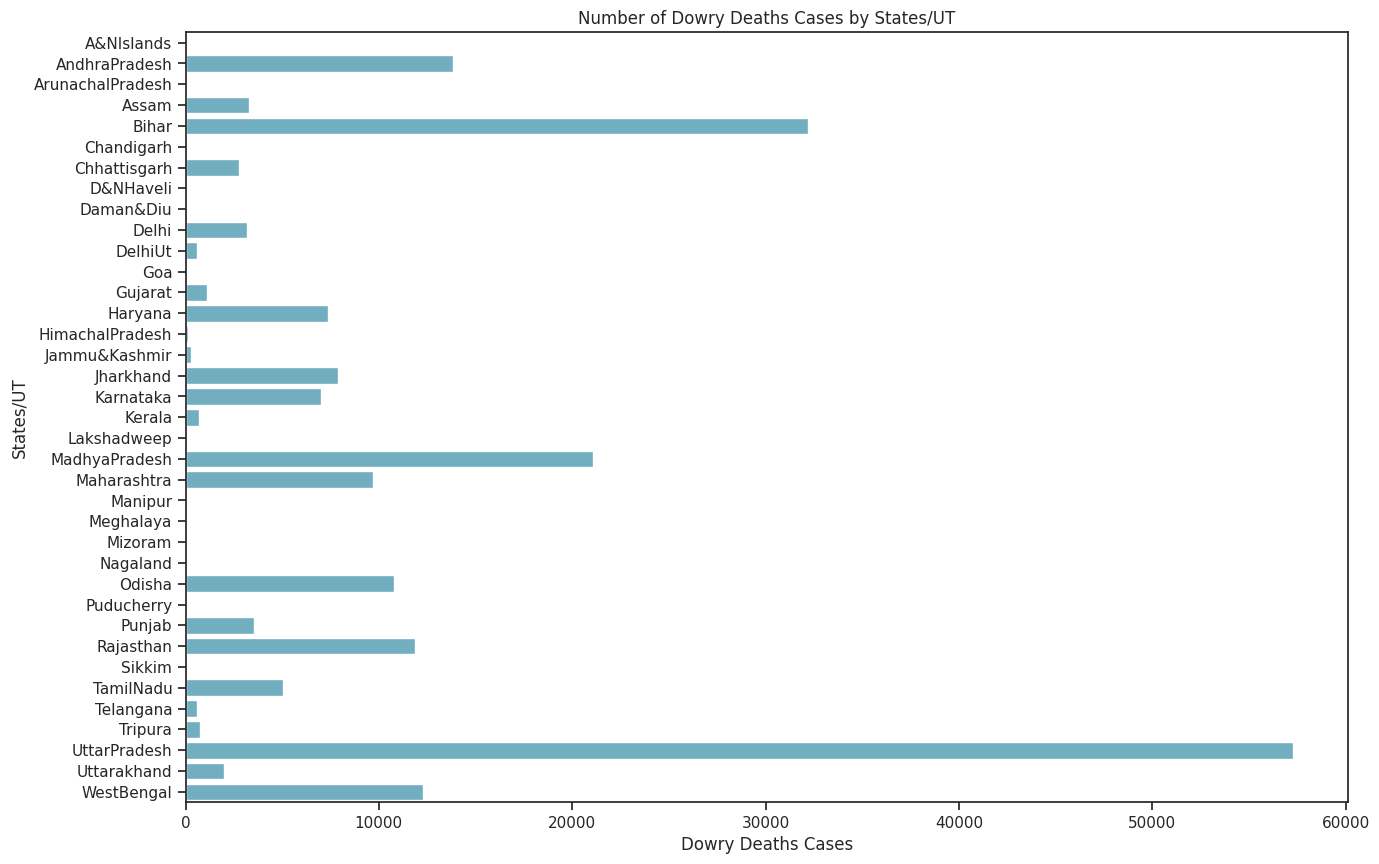

In [14]:
sns.set(style = "ticks")
plt.figure(figsize=(15,10))
sns.barplot(x="Dowry Deaths", y="STATE/UT", data=DowryCase, color = "c")
plt.xlabel("Dowry Deaths Cases")
plt.ylabel("States/UT")
plt.title("Number of Dowry Deaths Cases by States/UT")
plt.show()

In [15]:
DowryCaseYear = df.groupby("Year")["Dowry Deaths"].sum().reset_index()
DowryCaseYear["Rank"] = DowryCaseYear["Dowry Deaths"].rank(ascending = False)
DowryCaseYear.sort_values(by = "Rank")
DowryCaseYear["Year"] = DowryCaseYear["Year"].astype("int")
DowryCaseYear

,Year,Dowry Deaths,Rank
0,2001,13702,11.0
1,2002,13644,12.0
2,2003,12416,14.0
3,2004,14052,10.0
4,2005,13574,13.0
5,2006,15236,9.0
6,2007,16186,7.0
7,2008,16344,6.0
8,2009,16766,4.0
9,2010,16782,3.0


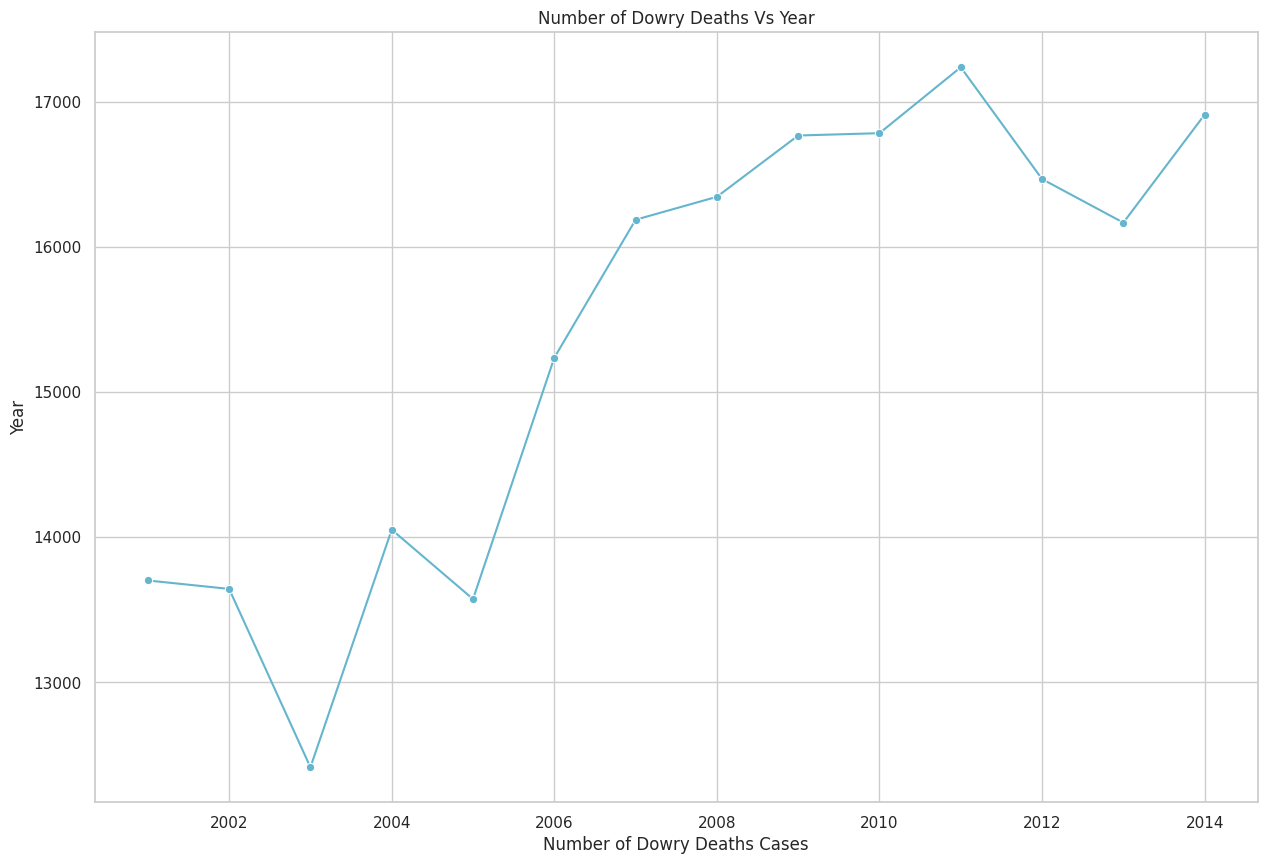

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="Dowry Deaths", data=DowryCaseYear, color="c", marker = "o")
plt.xlabel("Number of Dowry Deaths Cases")
plt.ylabel("Year")
plt.title("Number of Dowry Deaths Vs Year")
plt.show()

Top 10 states with Highest Dowry Deaths

In [17]:
DowryCase.sort_values(by = "Rank").head(10).set_index("Rank")

,STATE/UT,Dowry Deaths
Rank,,
1.0,UttarPradesh,57256
2.0,Bihar,32206
3.0,MadhyaPradesh,21090
4.0,AndhraPradesh,13844
5.0,WestBengal,12308
6.0,Rajasthan,11854
7.0,Odisha,10782
8.0,Maharashtra,9696
9.0,Jharkhand,7896


# EDA 4: Domestic Violence Case Study

In [18]:
DomesticCase = df.groupby("STATE/UT")[["Assault on women with intent to outrage her modesty", "Insult to modesty of Women", "Cruelty by Husband or his Relatives"] ].sum().reset_index()
DomesticCase["Rank"] = DomesticCase[["Assault on women with intent to outrage her modesty", "Insult to modesty of Women", "Cruelty by Husband or his Relatives"]].sum(axis = 1).rank(ascending = False)
DomesticCase["Total"] = DomesticCase[["Assault on women with intent to outrage her modesty", "Insult to modesty of Women", "Cruelty by Husband or his Relatives"]].sum(axis = 1)
DomesticCase.sort_values(by = "Rank")

,STATE/UT,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Rank,Total
1,AndhraPradesh,126952,86964,280906,1.0,494822
36,WestBengal,66908,5348,344124,2.0,416380
29,Rajasthan,83362,794,262200,3.0,346356
21,Maharashtra,114704,32634,193202,4.0,340540
34,UttarPradesh,91212,53130,193738,5.0,338080
20,MadhyaPradesh,195478,20964,102816,6.0,319258
18,Kerala,80438,7930,111626,7.0,199994
12,Gujarat,23186,3230,146468,8.0,172884
3,Assam,38256,254,115300,9.0,153810
17,Karnataka,65750,2276,72706,10.0,140732


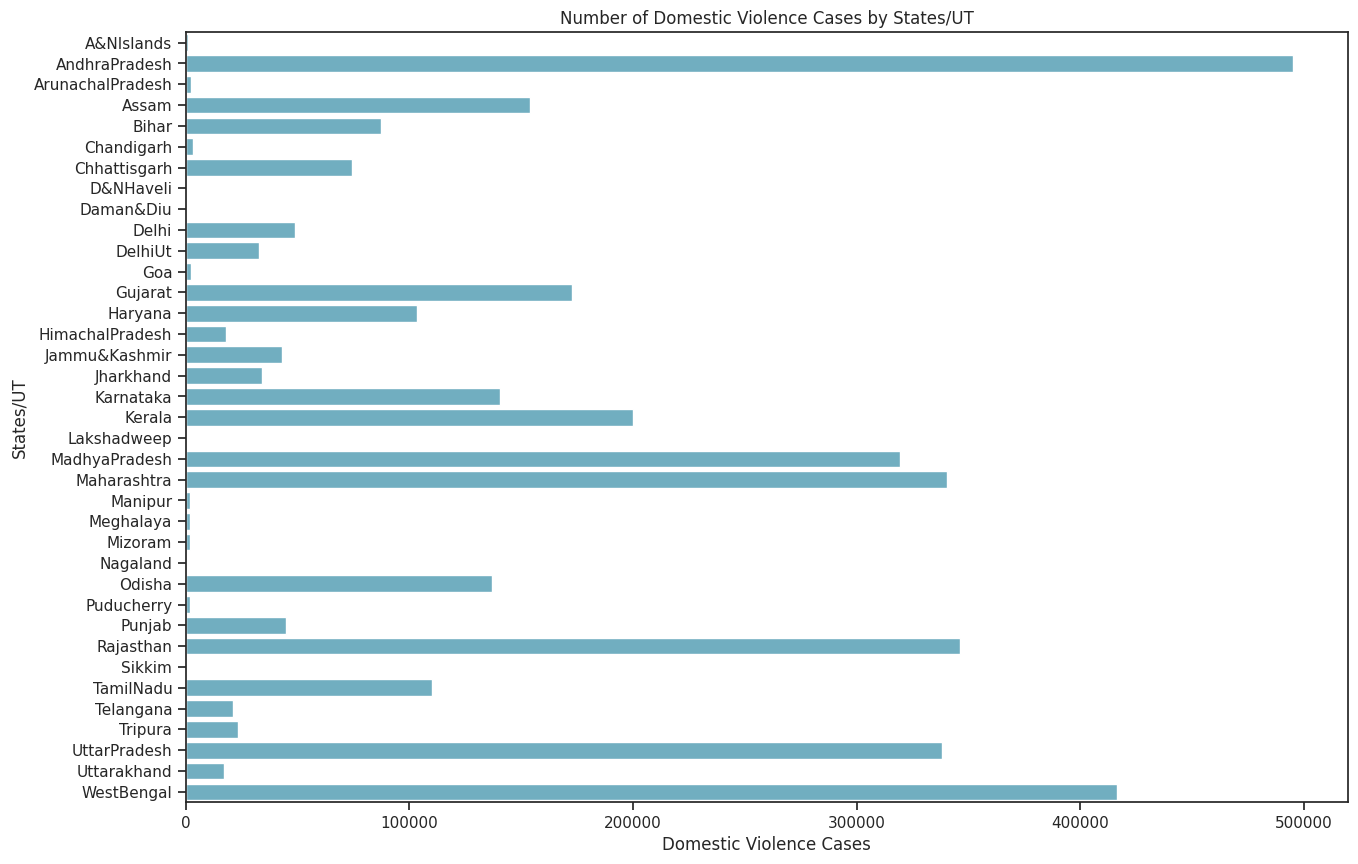

In [19]:
sns.set(style = "ticks")
plt.figure(figsize=(15,10))
sns.barplot(x="Total", y="STATE/UT", data=DomesticCase, color = "c")
plt.xlabel("Domestic Violence Cases")
plt.ylabel("States/UT")
plt.title("Number of Domestic Violence Cases by States/UT")
plt.show()

In [20]:
DomesticCaseYear = df.groupby("Year")[["Assault on women with intent to outrage her modesty", "Insult to modesty of Women", "Cruelty by Husband or his Relatives"] ].sum().reset_index()
DomesticCaseYear["Rank"] = DomesticCaseYear[["Assault on women with intent to outrage her modesty", "Insult to modesty of Women", "Cruelty by Husband or his Relatives"]].sum(axis=1).rank(ascending = False)
DomesticCaseYear.sort_values(by = "Rank")
DomesticCaseYear["Year"] = DomesticCaseYear["Year"].astype("int")
DomesticCaseYear

,Year,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Rank
0,2001,68248,19492,98340,14.0
1,2002,67886,20310,98474,13.0
2,2003,65878,24650,101406,12.0
3,2004,69134,20002,116242,10.0
4,2005,68350,19968,116638,11.0
5,2006,73234,19932,126256,9.0
6,2007,77468,21900,151860,8.0
7,2008,80826,24428,162688,7.0
8,2009,77422,22018,179092,6.0
9,2010,81226,19922,188082,5.0


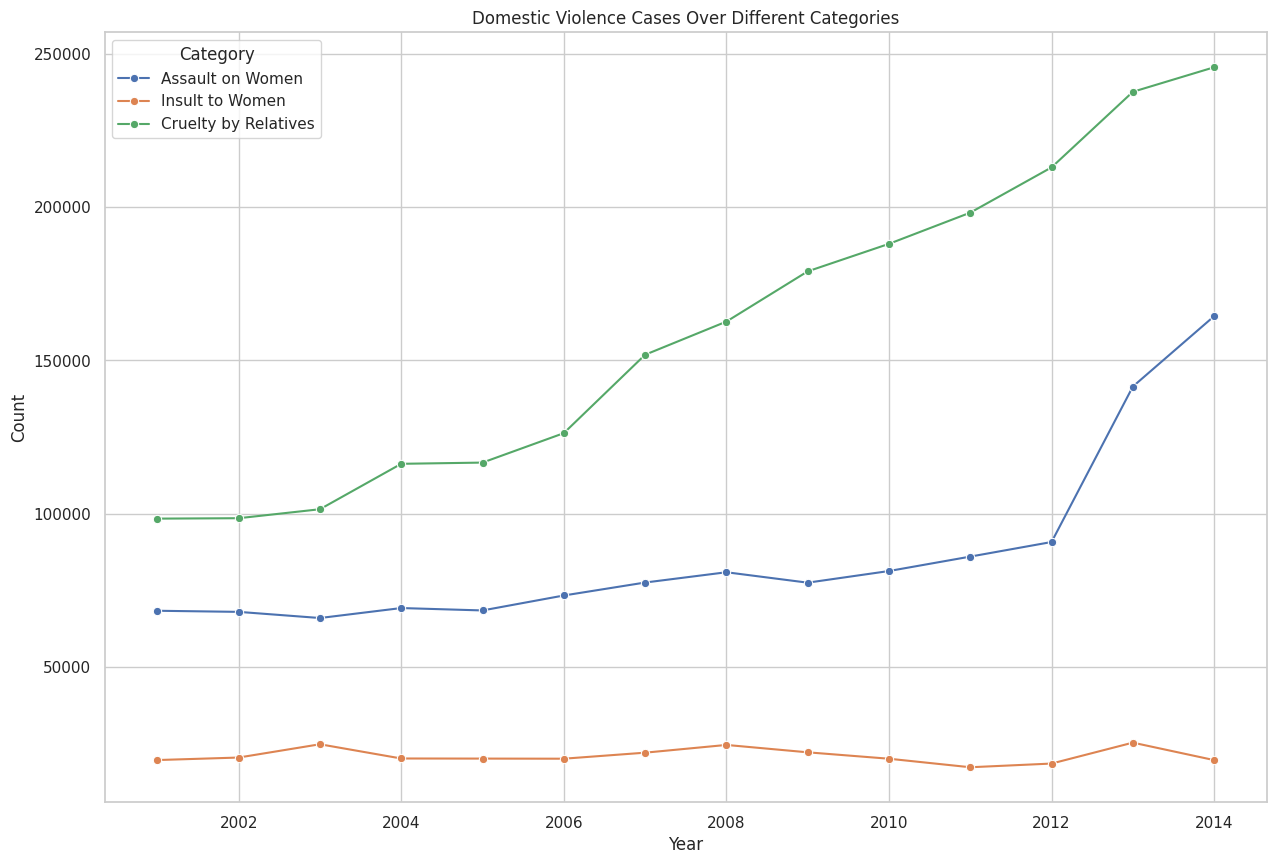

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="Assault on women with intent to outrage her modesty", data=DomesticCaseYear, marker="o", label="Assault on Women")
sns.lineplot(x="Year", y="Insult to modesty of Women", data=DomesticCaseYear, marker="o", label="Insult to Women")
sns.lineplot(x="Year", y="Cruelty by Husband or his Relatives", data=DomesticCaseYear, marker="o", label="Cruelty by Relatives")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Domestic Violence Cases Over Different Categories")
plt.legend(title="Category")
plt.show()

Top 10 Stats having highest Domestic Violence:

In [22]:
DomesticCase.sort_values(by = "Rank").head(10).set_index("Rank")

,STATE/UT,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Total
Rank,,,,,
1.0,AndhraPradesh,126952,86964,280906,494822
2.0,WestBengal,66908,5348,344124,416380
3.0,Rajasthan,83362,794,262200,346356
4.0,Maharashtra,114704,32634,193202,340540
5.0,UttarPradesh,91212,53130,193738,338080
6.0,MadhyaPradesh,195478,20964,102816,319258
7.0,Kerala,80438,7930,111626,199994
8.0,Gujarat,23186,3230,146468,172884
9.0,Assam,38256,254,115300,153810


# EDA 5 : Girl Importation Case Study

In [23]:
IGCase = df.groupby("STATE/UT")["Importation of Girls"].sum().reset_index()
IGCase["Rank"] = IGCase["Importation of Girls"].rank(ascending = False)
IGCase = IGCase[IGCase["Importation of Girls"] != 0]
IGCase.sort_values(by = "Rank")

,STATE/UT,Importation of Girls,Rank
4,Bihar,904,1.0
16,Jharkhand,298,2.0
36,WestBengal,254,3.0
20,MadhyaPradesh,134,4.0
17,Karnataka,94,5.0
26,Odisha,36,6.0
1,AndhraPradesh,34,7.0
31,TamilNadu,30,8.0
3,Assam,22,9.0
29,Rajasthan,14,10.0


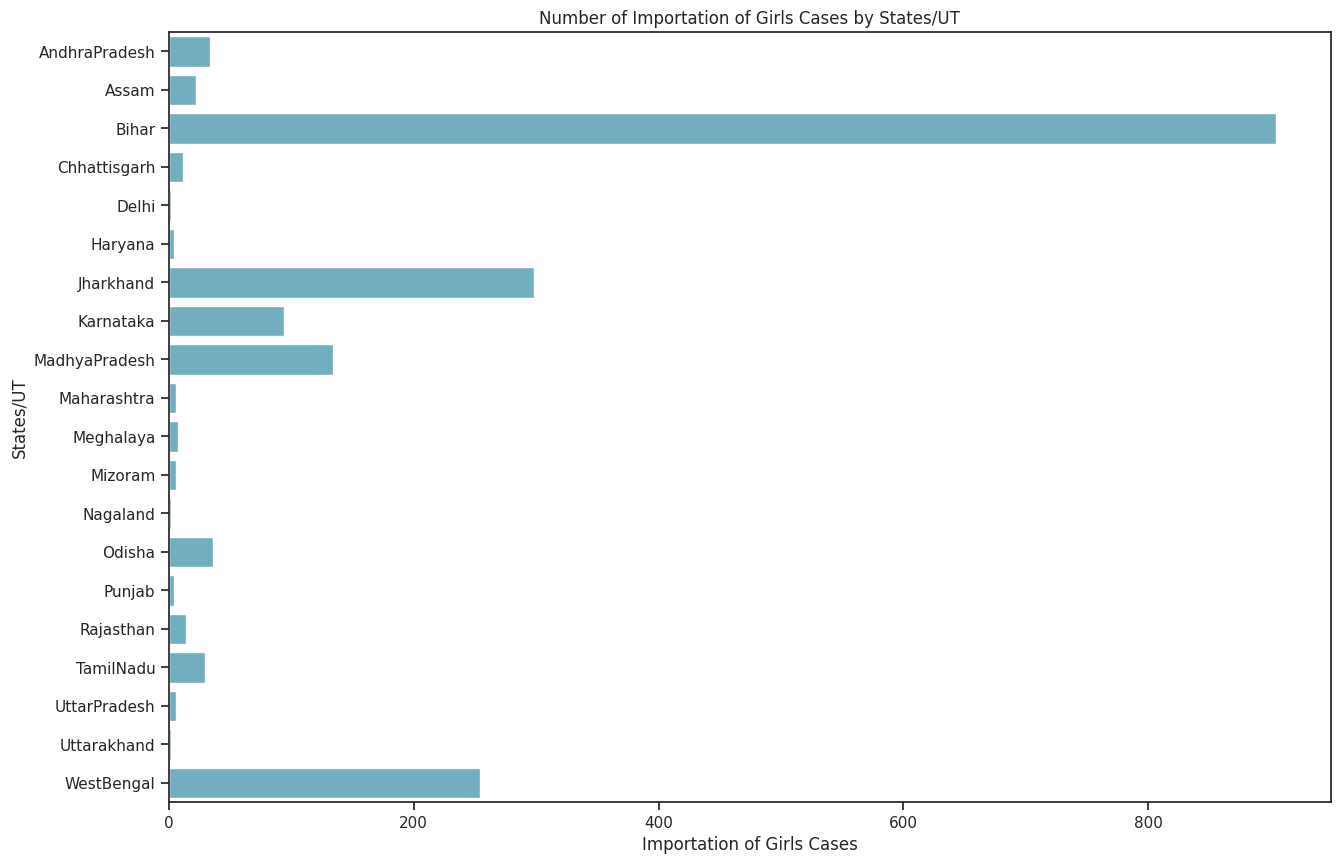

In [24]:
sns.set(style = "ticks")
plt.figure(figsize=(15,10))
sns.barplot(x="Importation of Girls", y="STATE/UT", data=IGCase, color = "c")
plt.xlabel("Importation of Girls Cases")
plt.ylabel("States/UT")
plt.title("Number of Importation of Girls Cases by States/UT")
plt.show()

In [25]:
IGCaseYear = df.groupby("Year")["Importation of Girls"].sum().reset_index()
IGCaseYear["Rank"] = IGCaseYear["Importation of Girls"].rank(ascending = False)
IGCaseYear.sort_values(by = "Rank")
IGCaseYear["Year"] = IGCaseYear["Year"].astype("int")
IGCaseYear

,Year,Importation of Girls,Rank
0,2001,228,2.0
1,2002,152,5.0
2,2003,92,11.0
3,2004,178,3.0
4,2005,298,1.0
5,2006,134,6.5
6,2007,122,8.0
7,2008,134,6.5
8,2009,96,10.0
9,2010,72,12.0


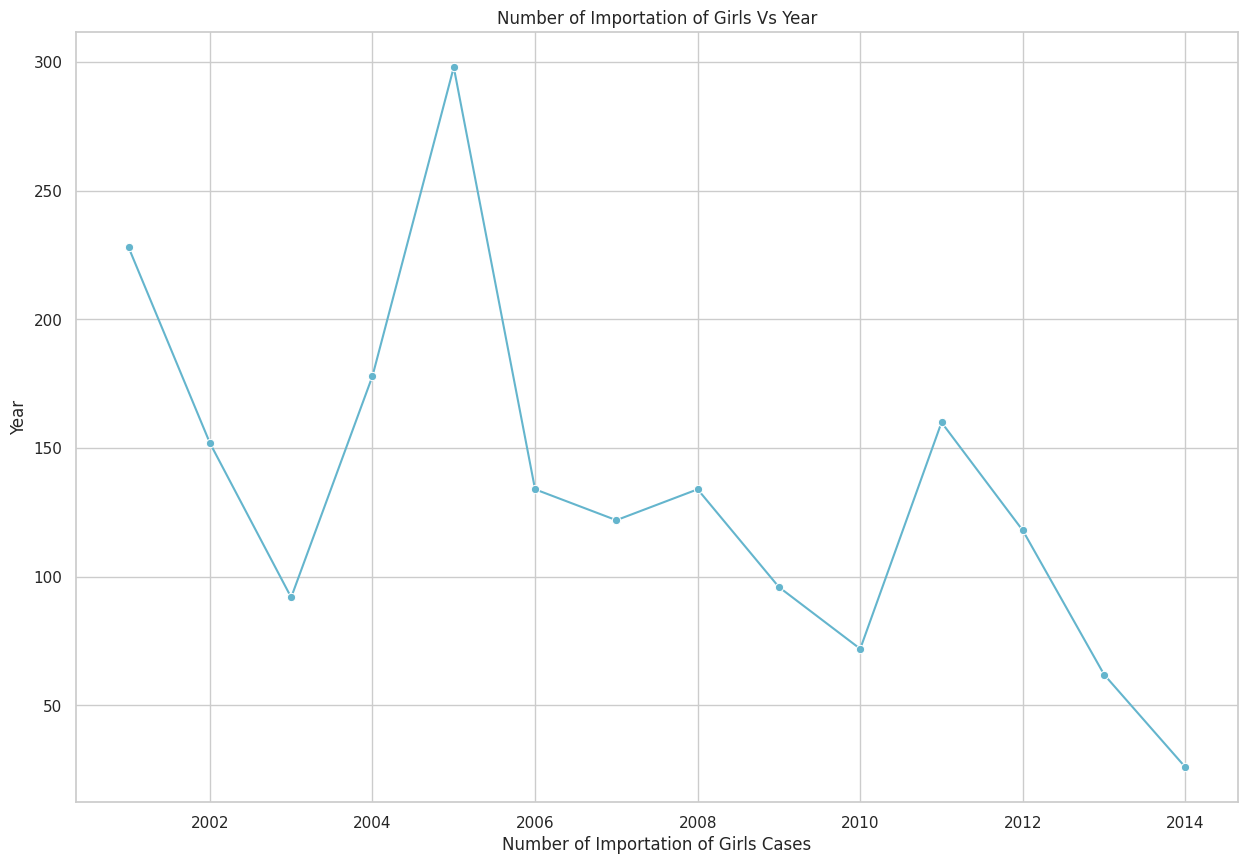

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="Importation of Girls", data=IGCaseYear, color="c", marker = "o")
plt.xlabel("Number of Importation of Girls Cases")
plt.ylabel("Year")
plt.title("Number of Importation of Girls Vs Year")
plt.show()

Top 10 States with highest Importation:

In [27]:
IGCase.sort_values(by = "Rank").head(10).set_index("Rank")

,STATE/UT,Importation of Girls
Rank,,
1.0,Bihar,904
2.0,Jharkhand,298
3.0,WestBengal,254
4.0,MadhyaPradesh,134
5.0,Karnataka,94
6.0,Odisha,36
7.0,AndhraPradesh,34
8.0,TamilNadu,30
9.0,Assam,22
